# **Week 7 - Simulation Methods**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.power as smp

## **Exercise 4.1 Reliability: System lifetime**

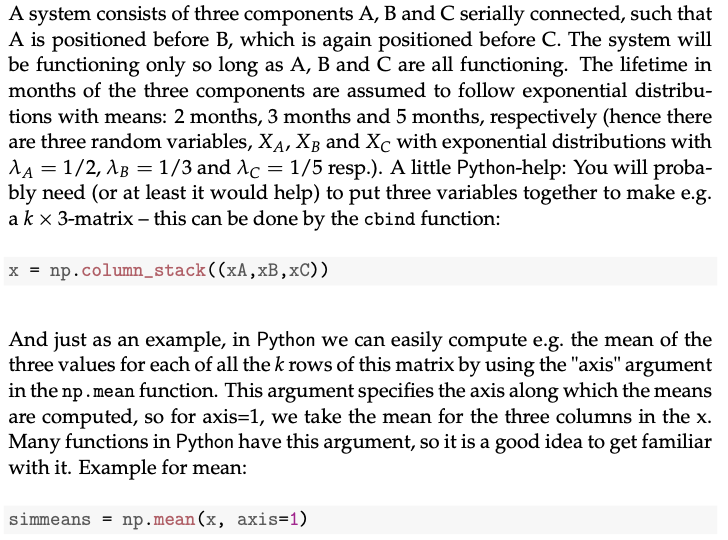

### **a) Simulating the system lifetime**

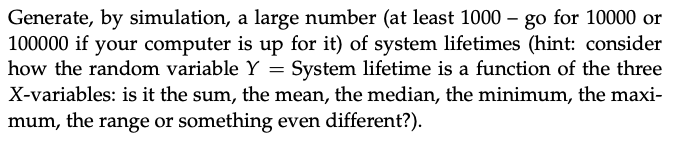

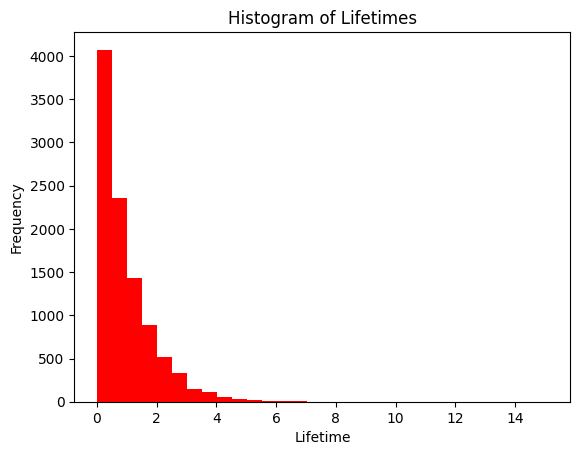

In [39]:
# Set the random seed for reproducibility
np.random.seed(123)

# Define the number of samples
k = 10000


xA = np.random.exponential(scale=2, size=k)
xB = np.random.exponential(scale=3, size=k)
xC = np.random.exponential(scale=5, size=k)

# Combine the simulated values into a single array
x = np.column_stack((xA, xB, xC))

# Calculate the minimum value for each row to determine the lifetimes
lifetimes = np.min(x, axis=1)

# Plot a histogram of the lifetimes
plt.hist(lifetimes, bins=30, color='red')
plt.title('Histogram of Lifetimes')
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.show()

### **b) Estimate the mean system lifetime**

In [5]:
np.mean(lifetimes)

0.966532540626529

### **c) Estimate the standard deviation of system lifetimes**

In [6]:
np.std(lifetimes,ddof=1)

0.9597730741673227

### **d) Estimate the probability that the system fails within 1 month**

In [7]:
## The fraction of times the simulated lifetime was below or equal 1
np.mean(lifetimes <= 1)

0.6414

In [8]:
np.sum(lifetimes <= 1)/k

0.6414

### **e) Estimate the median system lifetime**

In [9]:
np.median(lifetimes)

0.6694787612573221

### **f) Estimate the 10th percentile of system lifetimes**

In [10]:
np.percentile(lifetimes, 10)

0.1063888226519573

### **g) What seems to be the distribution of system lifetimes? (histogram etc)**

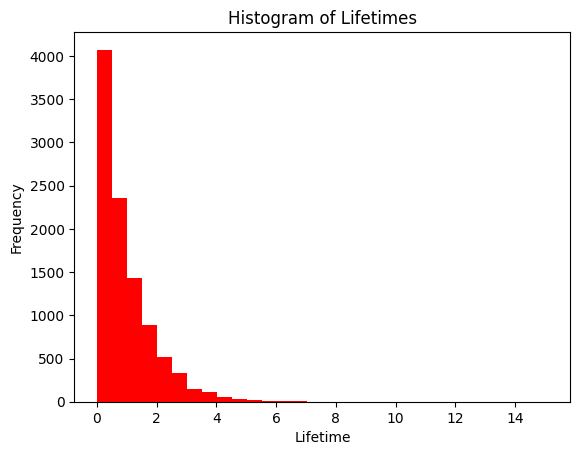

In [11]:
#plot histogram of the minimum values
plt.hist(lifetimes, bins=30, color='red')
plt.title('Histogram of Lifetimes')
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.show()

It appears that the minimum of the three exponential variables also has a distribution that looks like an exponential. 

## **Exercise 4.2 Basic bootstrap CI**

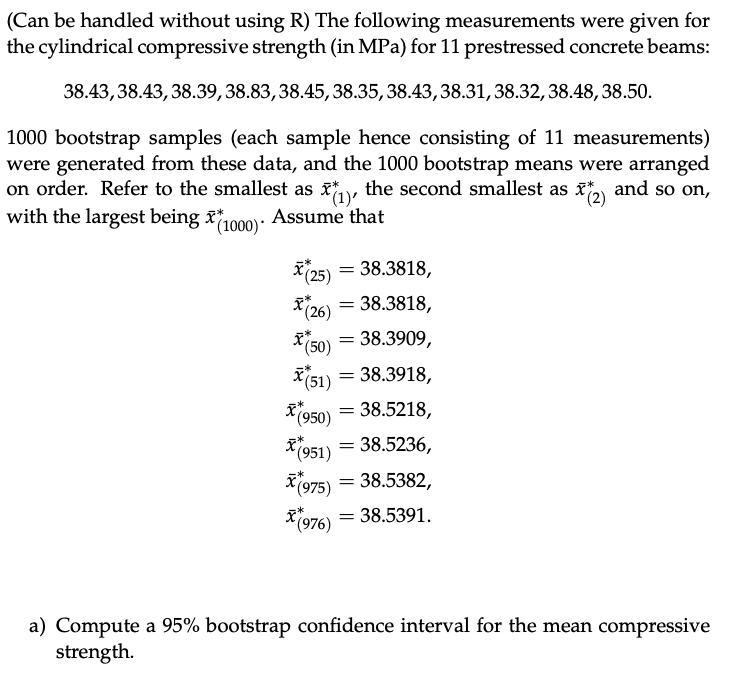

### **a) Compute a 95% bootstrap confidence interval for the mean compressive strength**

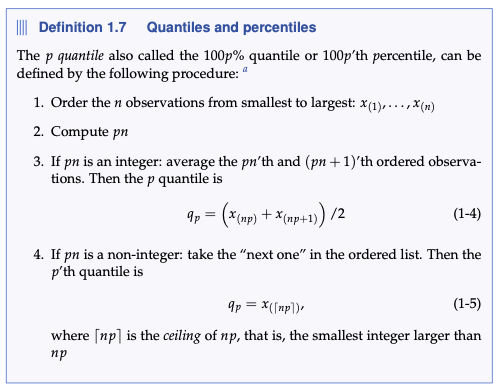

In [12]:
# Since there we have to find 95%, alpha is 0.05 and we need to find the quartiles:
0.05 / 2  # 2.5%
1 - 0.05 / 2  # 97.5%

# Definition 1.7 about quartiles, when computing p*n and when the number is an integer
# we need to take the average of the p'th and the (pn+1)'th value to find the p quartile

0.975

In [13]:
# So we have
print("p*n where p=0.025:", 1000 * 0.025,"\n")

# i.e., the 2.5% quartile is the average between the 25th and 26th observation:
q_25 = (38.3818 + 38.3818) / 2

print("p*n where p=0.975:", 1000 * 0.975,"\n")
# i.e., the 97.5% quartile is the average between the 975th and 976th observation:
q_975 = (38.5382 + 38.5391) / 2

# So the 95% confidence interval for the mean is:
print("The CI is:", (q_25, q_975))

p*n where p=0.025: 25.0 

p*n where p=0.975: 975.0 

The CI is: (38.3818, 38.538650000000004)


### **b) Compute a 90% bootstrap confidence interval for the mean compressive strength**

In [14]:
# Since we have to find the 90% CI, alpha is 0.1 and we need to find the quartiles:
0.1 / 2  # 5%
1 - 0.1 / 2  # 95%

# So we have
print("p*n where p=0.05:", 1000 * 0.05,"\n")
# i.e., the 5% quartile is the average between the 50th and 51st observation:
q_5 = (38.3909 + 38.3918) / 2

print("p*n where p=0.975:", 1000 * 0.95,"\n")
# i.e., the 95% quartile is the average between the 950th and 951st observation:
q_95 = (38.5218 + 38.5236) / 2

# So the 90% confidence interval for the mean is:

print("The CI is:", (q_5, q_95))

p*n where p=0.05: 50.0 

p*n where p=0.975: 950.0 

The CI is: (38.39135, 38.5227)


## **Exercise 4.3 Various bootstrap CIs**

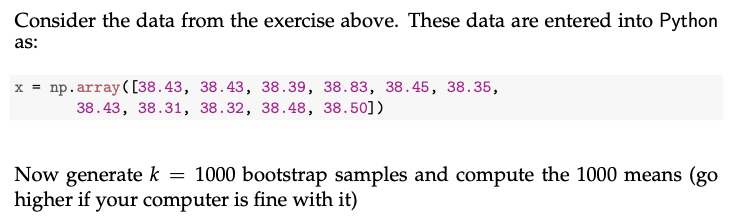

In [15]:
x = np.array([38.43, 38.43, 38.39, 38.83, 38.45, 38.35,
38.43, 38.31, 38.32, 38.48, 38.50])

k = 1000

### **a) What are the 2.5%, and 97.5% quantiles (so what is the 95% confidence interval for µ without assuming any distribution)?**

In [16]:
n = len(x)
simsamples = np.random.choice(x, (n, k), replace=True)
simmeans = np.mean(simsamples, axis=0)

print("95% non parametric CI:", np.quantile(simmeans, [0.025, 0.975]))

95% non parametric CI: [38.38090909 38.54002273]


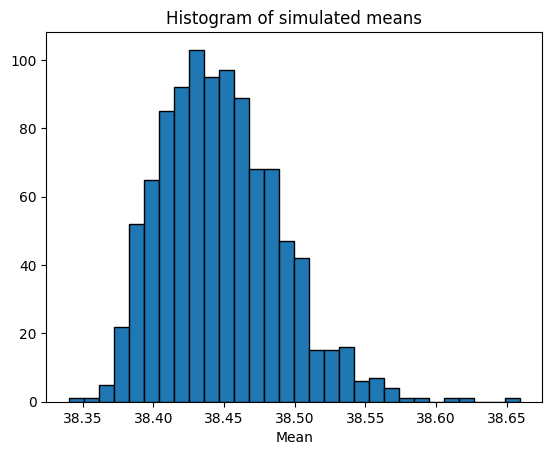

In [17]:
plt.hist(simmeans, bins=30, edgecolor = "black")
plt.title("Histogram of simulated means")
plt.xlabel("Mean")
plt.show()

### **b) Find the 95% confidence interval for µ by the parametric bootstrap assuming the normal distribution for the observations**

Compare with the
classical analytic approach based on the t-distribution from Chapter 2.

In [18]:
#parametric bootstrap
k = 10000
n = len(x)
simsamples = np.random.normal(np.mean(x), np.std(x,ddof=1), (n, k))
simmeans = np.mean(simsamples, axis=0)
print("95% parametric CI:",np.quantile(simmeans, [0.025, 0.975]))

95% parametric CI: [38.36226914 38.53183227]


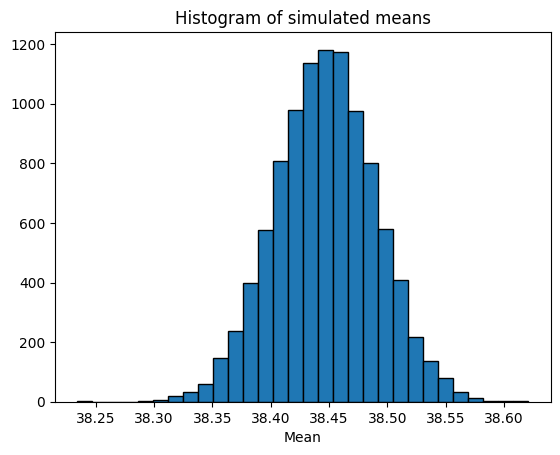

In [19]:
plt.hist(simmeans, bins=30, edgecolor = "black")
plt.title("Histogram of simulated means")
plt.xlabel("Mean")
plt.show()

In [20]:
#classic CI 
x_mean = np.mean(x)
x_sd = np.std(x, ddof=1)
t_975 = stats.t.ppf(1 - 0.05 / 2, df=n - 1)
confidence_interval = x_mean + np.array([-1, 1]) * t_975 * x_sd / np.sqrt(n)
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: [38.35249806 38.5420474 ]


### **c) Find the 95% confidence interval for µ by the parametric bootstrap assuming the log-normal distribution for the observations**

(Help: To use
the np.random.lognormal function to simulate the log-normal distribu-
tion, we face the challenge that we need to specify the mean and standard
deviation on the log-scale and not on the raw scale, so compute mean and
standard deviation for log-transformed data for this Python-function)

In [34]:
k = 10000
n = len(x)
simsamples = np.random.lognormal(np.mean(np.log(x)), np.std(np.log(x),ddof=1), (n, k))
simmeans = np.mean(simsamples, axis=0)
print("95% parametric CI:",np.quantile(simmeans, [0.025, 0.975]))

95% parametric CI: [38.36492549 38.53037776]


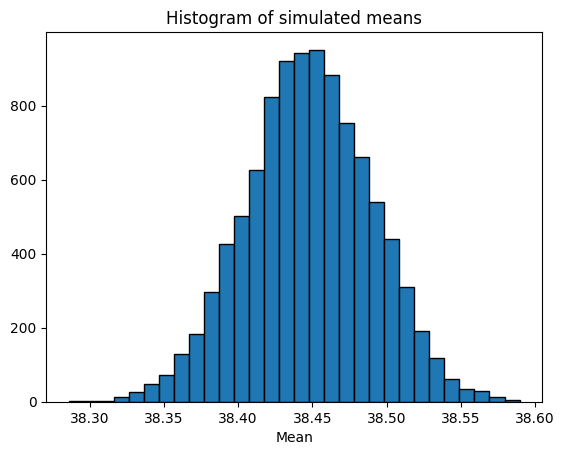

In [22]:
plt.hist(simmeans, bins=30, edgecolor = "black")
plt.title("Histogram of simulated means")
plt.xlabel("Mean")
plt.show()

### **d) Find the 95% confidence interval for the lower quartile Q1 by the parametric bootstrap assuming the normal distribution for the observations.**

In [32]:
k = 10000
n = len(x)
simsamples = np.random.normal(np.mean(x),np.std(x,ddof=1), (n, k))
simQ1s = np.quantile(simsamples, 0.25, axis=0)
print("95% parametric CI:", np.quantile(simQ1s, [0.025, 0.975]))

95% parametric CI: [38.25954976 38.46590113]


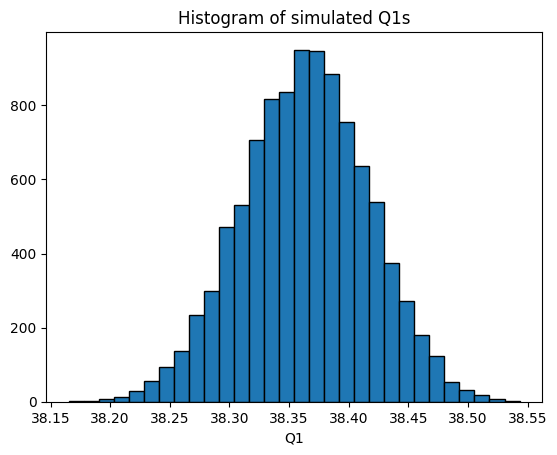

In [24]:
plt.hist(simQ1s, bins=30, edgecolor = "black")
plt.title("Histogram of simulated Q1s")
plt.xlabel("Q1")
plt.show()

### **e) Find the 95% confidence interval for the lower quartile Q1 by the non-parametric bootstrap (so without any distributional assumptions)**

In [31]:
k = 10000
n = len(x)
simsamples = np.random.choice(x, (n, k), replace=True)
simQ1s = np.quantile(simsamples, 0.25, axis=0)
print("95% non-parametric CI:",np.quantile(simQ1s, [0.025, 0.975]))



95% non-parametric CI: [38.315 38.43 ]


## **Exercise 4.4 Two-sample TV data**

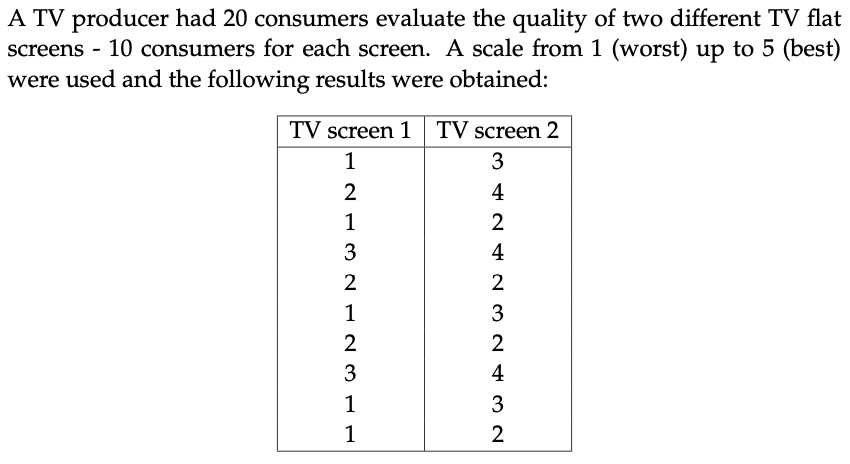

In [43]:
x1 = np.array([1, 2, 1, 3, 2, 1, 2, 3, 1, 1])
x2 = np.array([3, 4, 2, 4, 2, 3, 2, 4, 3, 2])

### **a) Compare the two means without assuming any distribution for the two samples**

In [44]:
#bootstrapping the samples:

k = 10000
n = len(x1) # same as len(x2)

## Simulated samples of TV1 and TV2 groups
simx1samples = np.random.choice(x1, (n, k), replace=True)
simx2samples = np.random.choice(x2, (n, k), replace=True)
simmeandifs = np.mean(simx1samples, axis=0) - np.mean(simx2samples,axis=0)

In [45]:
#the CI becomes:
print("95% non-parametric CI:",np.quantile(simmeandifs, [0.025, 0.975]))

95% non-parametric CI: [-1.9 -0.5]


Since 0 is not included in the CI, we reject that $H_0: \mu_1 = \mu_2$.

### **b) Compare the two means assuming normal distributions for the two samples - without using simulations**

In [29]:
#do a t-test
t_stat, p_value = stats.ttest_ind(x1, x2)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -3.157408869505305, p-value: 0.005449057981469948


Same conclusion, we reject $H_0$.

### **c) Compare the two means assuming normal distributions for the two samples - simulation based**
(parametric bootstrap confidence interval and relevant hypothesis test interpretation – in spite of the obviously wrong assumption).

In [30]:
simx1samples = np.random.normal(np.mean(x1), np.std(x1,ddof=1), (n, k))
simx2samples = np.random.normal(np.mean(x2), np.std(x2,ddof=1), (n, k))
simmeandifs = np.mean(simx1samples, axis=0) - np.mean(simx2samples,
axis=0)
# Confidence interval
print("95% parametric CI:",np.quantile(simmeandifs, [0.025, 0.975]))

95% parametric CI: [-1.94363858 -0.45633859]
